In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sb
from matplotlib import pyplot as plt

In [4]:
data=pd.read_csv(r"C:\Users\Shubh_Ram\Dropbox\My PC (LAPTOP-F3BSREE1)\Desktop\Online_ML_DataSets\healthcare-dataset-stroke-data.csv")

In [7]:
data.shape

(5110, 12)

In [8]:
data.head(1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


In [13]:
X_feature=data.drop('stroke',axis=1)
y_target=data["stroke"]

In [15]:
X_feature.drop("id",axis=1,inplace=True)

In [21]:
#X_feature.info()

In [22]:
#X_feature.isna().sum()

In [23]:
# filling null values in 'bmi' column in data

X_feature['bmi'].fillna(X_feature['bmi'].mean(), inplace = True)

In [26]:
#X_feature.isna().sum()

In [27]:
X_feature.drop('ever_married', axis = 1, inplace = True)

In [61]:
#X_feature.head()

In [32]:
X_feature_knn=X_feature

In [35]:
X_feature_knn=pd.get_dummies(X_feature_knn)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_feature_knn,y_target,test_size=.30,random_state=101)

In [38]:
# Implemeting knn

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [44]:

k=int(np.sqrt(len(Xtrain)))+1
k_value=list(range(1,k))

In [48]:
list_acc=[]
for i in k_value:
    knn_model=KNeighborsClassifier(n_neighbors=i)
    knn_model=knn_model.fit(Xtrain,Ytrain)
    Yp=knn_model.predict(Xtest)
    acc=accuracy_score(Yp,Ytest)
    list_acc.append(acc)
    #print("acc is {} at k ={}".format(acc,i))
    

In [51]:
import numpy as np
list_arr=np.array(list_acc)
list_arr.argmax()

9

In [57]:
print("Max acc is {} at k ={}".format(list_arr[list_arr.argmax()],list_arr.argmax()))

Max acc is 0.9432485322896281 at k =9


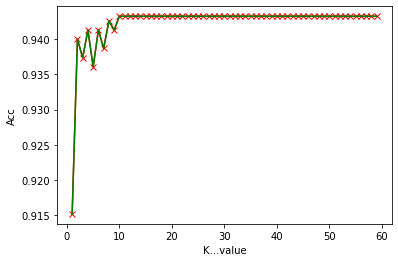

In [60]:
plt.plot(k_value,list_acc,'rx-')
plt.plot(k_value,list_acc,'g')
plt.xlabel("K...value")
plt.ylabel("Acc")
plt.show()

In [63]:
model_lr=LogisticRegression()
model_lr=model_lr.fit(Xtrain,Ytrain)

C:\Users\Shubh_Ram\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
Yp_lr=model_lr.predict(Xtest)

In [67]:
acc_lr=accuracy_score(Yp_lr,Ytest)*100

In [68]:
acc_lr

94.3900848010437